# Trabajo Final de Estadística 2018
- Autor: Emiliano López

## Hidrómetro

Resumen: En el siguiente análisis si estudian las mediciones de la altura del Río Paraná registradas por dos metodologías diferentes, las realizadas por Prefectura Naval observando la escala hidrométrica en forma manual del Puerto de Santa Fe, y las tomadas en forma automática por un dispositivo electrónico desarrollado en el CENtro de Estudios Hidroambientales (CENEHA) usando un distanciómetro acústico como sensor de nivel. 

### Lectura y Visualización

In [2]:
datosRio = read.csv("datos/hidrometro/ceneha_vs_prefectura.csv", sep=";")
datosRio$FechayHora = as.POSIXct(datosRio$FechayHora, format = "%d/%m/%Y %H:%M")
str(datosRio)
attach(datosRio)
head(datosRio)

'data.frame':	729 obs. of  3 variables:
 $ FechayHora      : POSIXct, format: "2017-07-26 12:00:00" "2017-07-26 00:00:00" ...
 $ AlturaCeneha    : num  4.27 4.28 4.21 4.23 4.15 4.18 4.08 4.12 3.98 4.03 ...
 $ AlturaPrefectura: num  4.25 4.28 4.18 4.2 4.15 4.18 4.1 4.13 4.03 4.03 ...


FechayHora,AlturaCeneha,AlturaPrefectura
2017-07-26 12:00:00,4.27,4.25
2017-07-26 00:00:00,4.28,4.28
2017-07-27 12:00:00,4.21,4.18
2017-07-27 00:00:00,4.23,4.20
2017-07-28 12:00:00,4.15,4.15
2017-07-28 00:00:00,4.18,4.18


In [3]:
# no lo veo tan lindo respecto al plot nativo
#library(ggplot2)
#ggplot(aes(x = datos$FechayHora, y = datos$AlturaCeneha), data = datos) + geom_point()
#ggplot(aes(x = datos$FechayHora, y = datos$AlturaPrefectura), data = datos) + geom_line()

Warning message in plot.xy(xy, type, ...):
“plot type 'lines' will be truncated to first character”

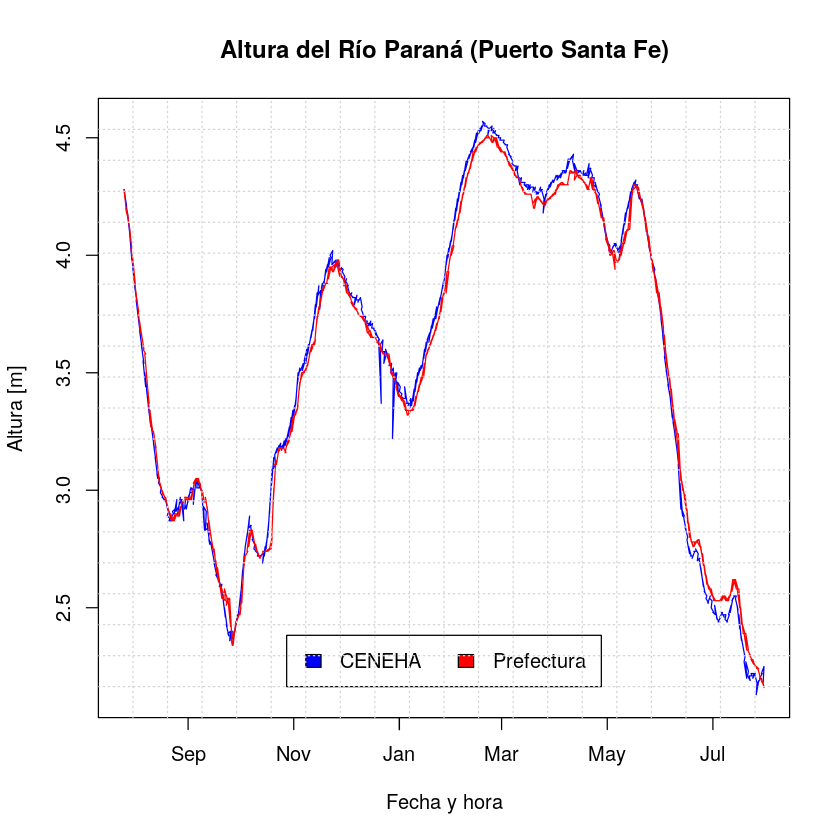

In [4]:
plot(FechayHora, AlturaCeneha, col="blue", main="Altura del Río Paraná (Puerto Santa Fe)",xlab="Fecha y hora", ylab="Altura [m]", type="lines")
lines(FechayHora, AlturaPrefectura,col="red")
legend("bottom", inset=.05, c("CENEHA","Prefectura"), fill=c("blue","red"), horiz=TRUE)
grid(nx = 20, ny = 20, col = "lightgray", lty = "dotted", lwd = par("lwd"), equilogs = TRUE)

### Modelo lineal
- Los datos parecen ser muy similares, por lo que un modelo lineal debe alcanzar para una buena aproximación

In [5]:
modeloRio = lm(AlturaPrefectura ~ AlturaCeneha)
summary(modeloRio)


Call:
lm(formula = AlturaPrefectura ~ AlturaCeneha)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.300628 -0.027215  0.000335  0.028950  0.275376 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.153339   0.009352    16.4   <2e-16 ***
AlturaCeneha 0.953815   0.002592   368.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0484 on 727 degrees of freedom
Multiple R-squared:  0.9947,	Adjusted R-squared:  0.9947 
F-statistic: 1.355e+05 on 1 and 727 DF,  p-value: < 2.2e-16


El ajuste de este modelo de regresión lineal nos queda:

$$E(Y_t|X_t) = 0.153339 + 0.953815 X_t$$

Warning message in plot.xy(xy, type, ...):
“plot type 'lines' will be truncated to first character”

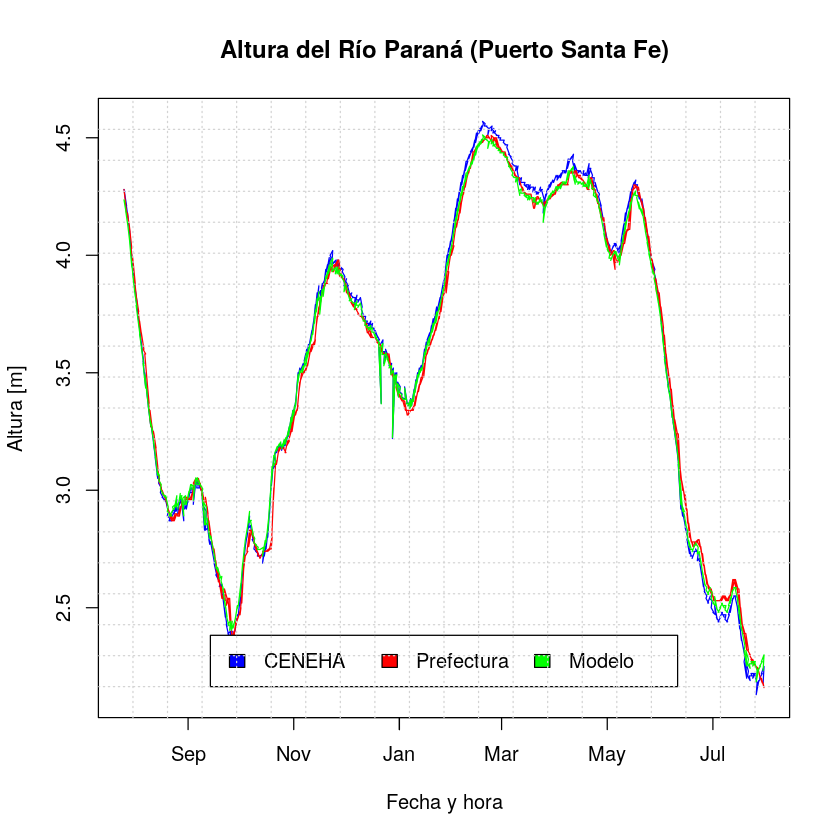

In [6]:
plot(FechayHora, AlturaCeneha, col="blue", main="Altura del Río Paraná (Puerto Santa Fe)",xlab="Fecha y hora", ylab="Altura [m]", type="lines")
lines(FechayHora, AlturaPrefectura,col="red")
legend("bottom", inset=.05, c("CENEHA","Prefectura", "Modelo"), fill=c("blue","red", "green"), horiz=TRUE)
grid(nx = 20, ny = 20, col = "lightgray", lty = "dotted", lwd = par("lwd"), equilogs = TRUE)

# superponemos el modelo
lines(FechayHora, modeloRio$fitted.values, col='green')

### Outliers
- vemos que el modelo sobreajusta (overfitted) incluso valores anómalos

Loading required package: carData


     rstudent unadjusted p-value Bonferonni p
166 -6.385735         3.0437e-10   2.2188e-07
306  5.822192         8.7196e-09   6.3566e-06
167 -5.800471         9.8707e-09   7.1957e-06
164 -4.964390         8.5960e-07   6.2665e-04
291  4.661829         3.7296e-06   2.7189e-03

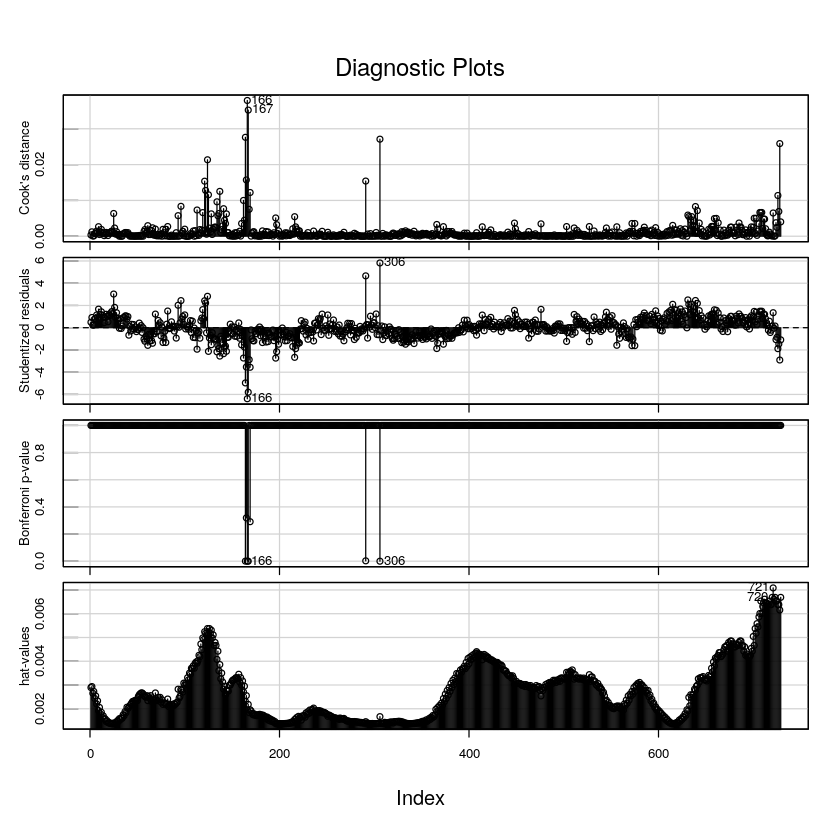

In [7]:
library(car)
outlierTest(modeloRio)
influenceIndexPlot(modeloRio)

#AlturaCeneha[290]
#AlturaCeneha[291]
#AlturaCeneha[292]

#AlturaPrefectura[290]
#AlturaPrefectura[291]
#AlturaPrefectura[292]

#AlturaCeneha[305]
#AlturaCeneha[306]
#AlturaCeneha[307]

#AlturaPrefectura[305]
#AlturaPrefectura[306]
#AlturaPrefectura[306]

### Supuestos del modelo
- **Normalidad**

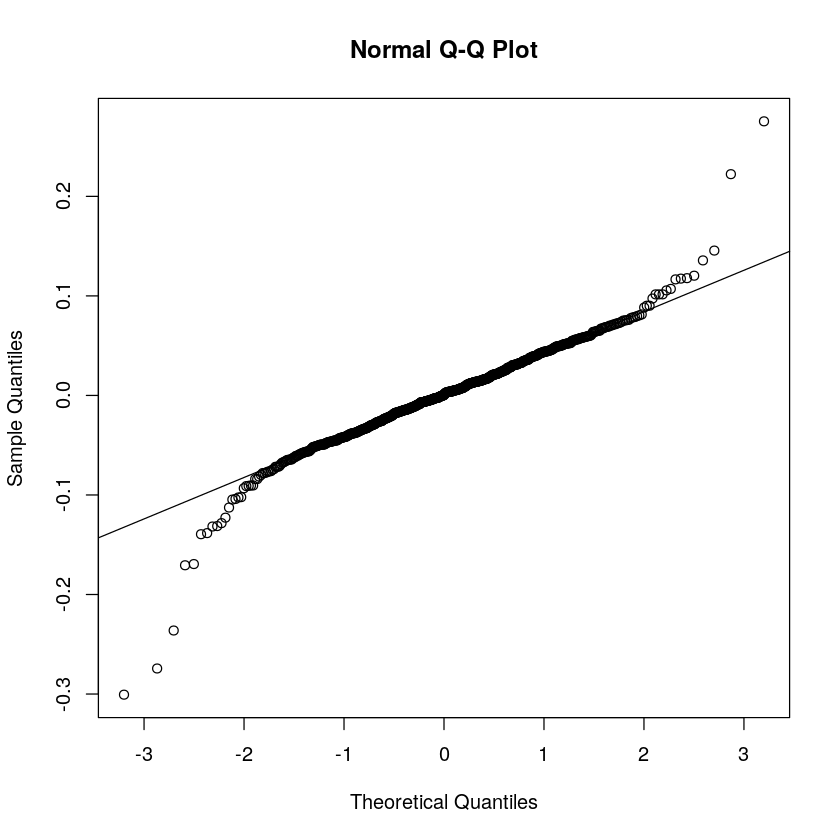

In [8]:
qqnorm(modeloRio$residuals)
qqline(modeloRio$residuals)

- **Varianza constante:** parecería que para este caso no funciona el leveneTest, sin embargo si probamos con ncvTest nos da un pvalor muy pequeño. ¿Corresponde analizar las varianzas acá? porque no tenemos diferentes tratamientos.

In [9]:
ncvTest(modeloRio)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 79.97045, Df = 1, p = < 2.22e-16

- **Independencia de los residuos**

    - Veremos que no es posible asegurar la independencia de los errores
    - Cada valor es dependiente del anterior
    
#### Gráfico de rachas 

Como los datos han sido colectados a través del tiempo puede ocurrir una correlación serial. Graficando los residuos vs el orden temporal en el que los datos fuerfon colectados podemos evaluar los patrones. En patrón que se observará muestra una correlación serial positiva en la cual los residuos tienden a seguirse en el tiempo por residuos del mismo signo y de aproximadamente el mismo tamaño, de aquí que se lo demonina rachas. Vemos que hay rachas lejos de la media 0, por encima y otras por debajo.

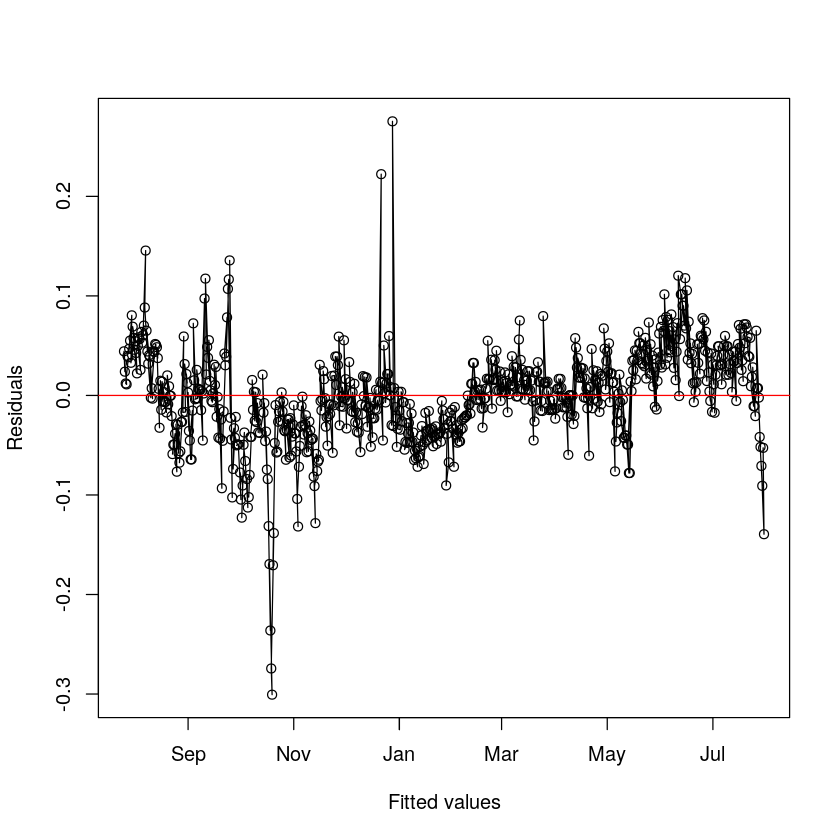

In [10]:
plot(FechayHora, modeloRio$residuals, type='o',  ylab = 'Residuals', xlab = 'Fitted values',)
abline(h=0,col='red')

#### Gráfico de residuos adyacentes

Como la mayoria de los puentos están en el primer y tercer cuadrante: **correlacion serial presente**. El valor del desvío en un punto es similar al del punto mas reciente en el tiempo. 

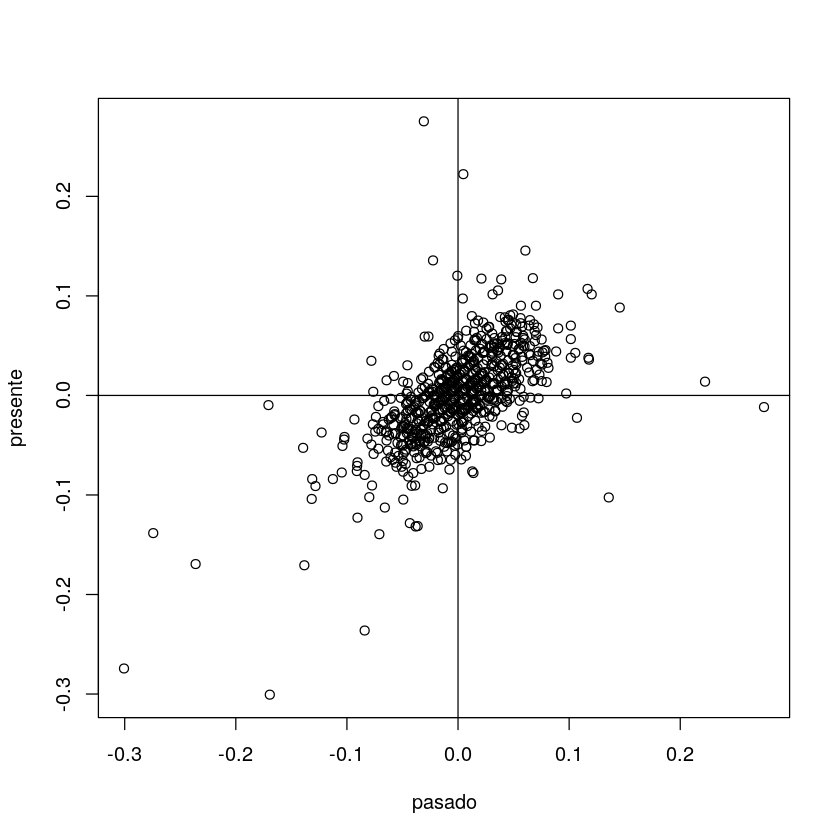

In [11]:
n = length(AlturaCeneha)
residuos = modeloRio$residuals
pasado = residuos[-n]   # elimina el último
presente = residuos[-1] # elimina el primero
plot(presente~pasado)
abline(h = 0, v = 0)

In [12]:
#plot(AlturaCeneha~AlturaPrefectura, main="Gráfico de dispersión", xlab="Prefectura", ylab="CENEHA", data = datos)
#abline(lm(AlturaCeneha~AlturaPrefectura, data = datos), col="red")
#lines(lowess(AlturaPrefectura,AlturaCeneha), col="blue")

### Estimamos el primer coeficiente de correlación serial

- H0: $\alpha = 0$
- H1: $\alpha \neq 0$

Ahora $\alpha$ será aproximado por el coeficiente de correlación serial $$r1 = c1/c0$$, que es similar a la pendiente de la recta en la regresión.

- Si r1 = 0 no existe correlación serial y por lo tanto el factor de ajuste es 1;
- Si r1 > 0 el factor de ajuste es más grande que 1;
- Si r1 = 0 el factor de ajuste es más chico que 1;

In [14]:
s = length(residuos)
c1 = sum(presente*pasado)/(n-1)
c0 = sum(presente^2)/(n-1)
r1 = c1/c0
abs(r1*sqrt(s))>qnorm(1-0.05/2)

[1] TRUE

**Como me da verdadero entonces el coeficiente de correlacion es no nulo y sostengo que hay correlacion entre los datos y hago filtering**

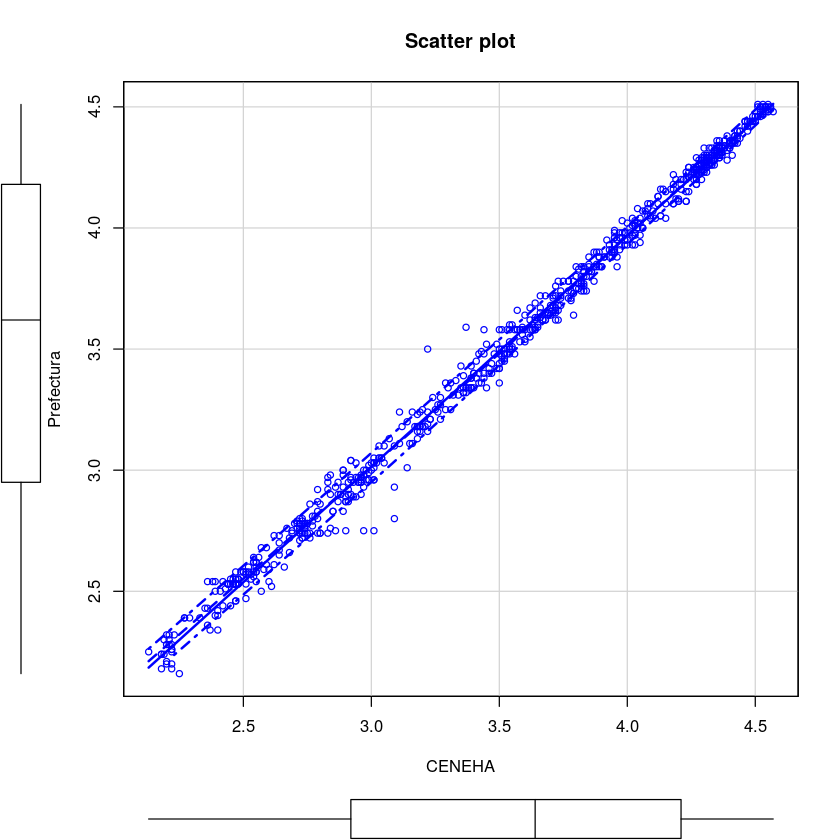

In [17]:
library(car)
scatterplot(AlturaPrefectura ~ AlturaCeneha, data=datosRio, xlab="CENEHA", ylab="Prefectura", main="Scatter plot") 

### Regresión con variables filtradas

Crear nuevas variables respuestas y explicativas tales que el coeficiente de regresión sea el mismo pero que los residuos sean independientes

In [16]:
V = AlturaPrefectura[2:s] - r1 * AlturaPrefectura[1:(s-1)]
U = AlturaCeneha[2:s] -r1*AlturaCeneha[1:(s-1)]
modeloF = lm(V~U)
summary(modeloF)


Call:
lm(formula = V ~ U)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.195117 -0.019891  0.000686  0.020985  0.292462 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.067078   0.007192   9.327   <2e-16 ***
U           0.946608   0.005312 178.186   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03776 on 726 degrees of freedom
Multiple R-squared:  0.9776,	Adjusted R-squared:  0.9776 
F-statistic: 3.175e+04 on 1 and 726 DF,  p-value: < 2.2e-16


**Estudiamos los residuos del modelo filtrado**

null device 
          1

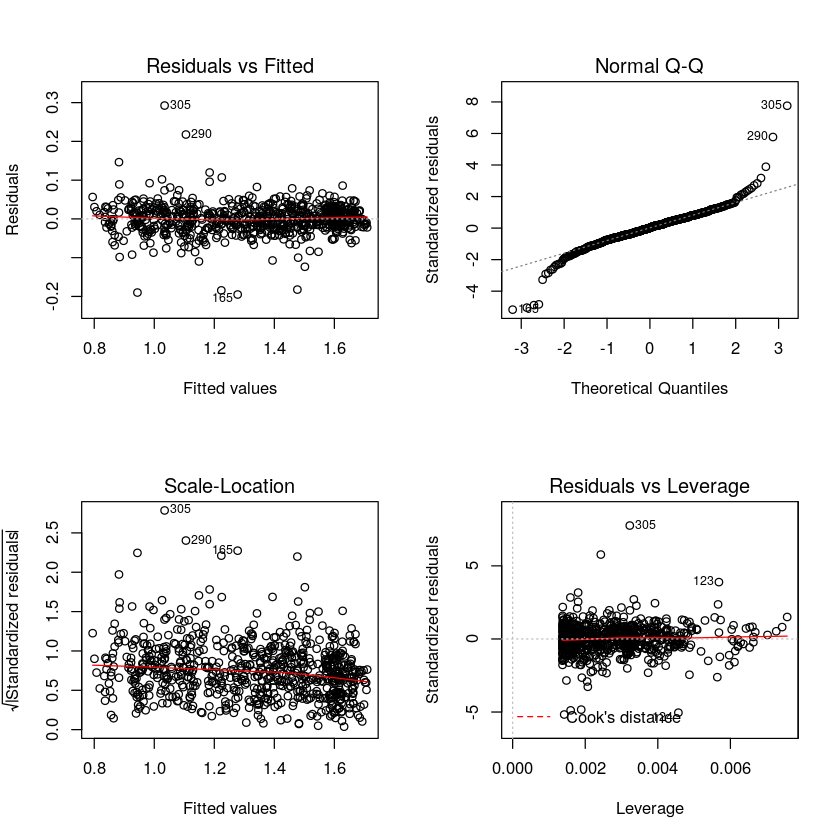

In [17]:
par(mfrow=c(2,2))
plot(modeloF)
dev.off()

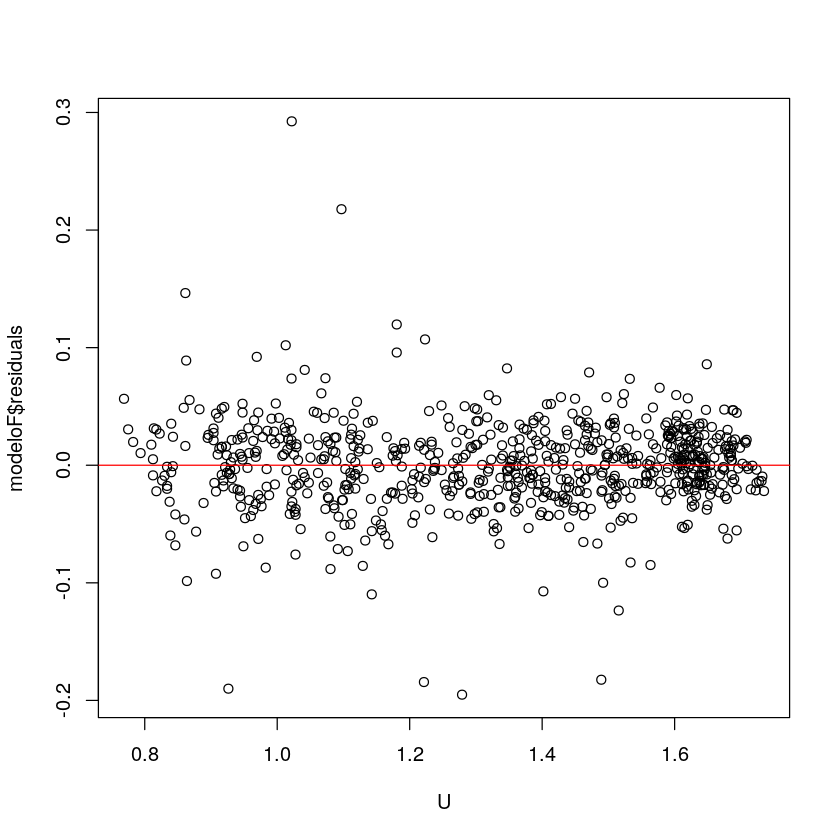

In [26]:
plot(U, modeloF$residuals)
#lines(U,modeloF$residuals)
abline(h=0,col='red')

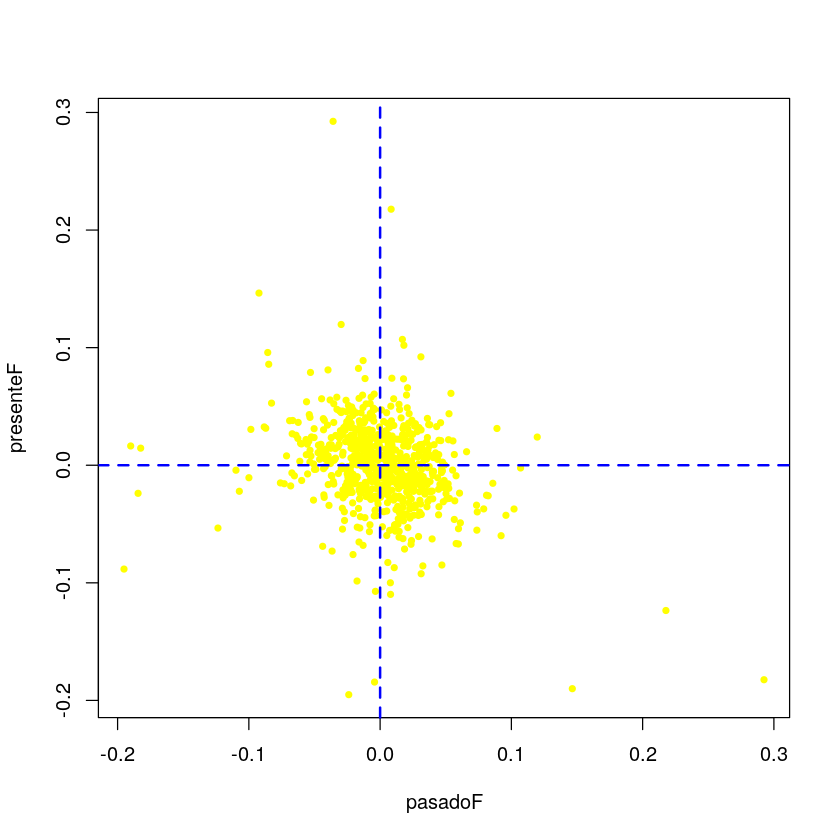

In [27]:
#comparo el presnte vs el pasado
residuosF = modeloF$residuals
sF = length(residuosF)
pasadoF = residuosF[1:(sF-1)]
presenteF=residuosF[2:(sF)]

plot(presenteF~pasadoF,col='yellow',pch=20)
abline(h=0,v=0,col='blue',lwd=2,lty=2)

In [28]:
#hipotesis de que hay correlacion
c1F=1/(sF-1)*sum(presenteF*pasadoF)
c0F=1/(sF-1)*sum(residuosF^2)

r1F=c1F/c0F

#testeo si r1 es 0 o no, 
# es no 0 si es es TRUE
abs(r1F*sqrt(sF))>qnorm(1-0.05/2)

[1] TRUE

## Humedad y temperatura ambiente

Resumen: en el siguiente trabajo se analizan la temperatura y humedad ambiente, ambas registradas con dos equipos diferentes. Por un lado por los sensores provistos por una estación Eddy Covariance de Campbell Scientific y por el otro, con el sensor DHT22. Los valores registrados por la estación son los tomados como verdaderos, ya que es un equipo profesional y muy utilizado para fines científicos.  El sensor DH22 es un sensor muy económico del que se pretendende evaluar la confiabilidad de sus mediciones. 

In [8]:
datosHT = read.csv("datos/dht_eddyCovariance/dht_vs_eddy.csv", sep=";")
datosHT$FechayHora = as.POSIXct(datosHT$FechayHora, format = "%d/%m/%Y %H:%M")
str(datosHT)
attach(datosHT)
head(datosHT)

'data.frame':	4218 obs. of  5 variables:
 $ FechayHora      : POSIXct, format: "2014-12-29 10:45:00" "2014-12-29 11:00:00" ...
 $ Temperatura.DHT : num  29.1 29.3 29.4 29.8 30.2 30.1 30.2 30.3 30.8 30.7 ...
 $ Humedad.DHT     : num  72.3 73.6 69 68.8 65.4 65.1 63.2 64.9 66.8 62.9 ...
 $ Temperatura.Eddy: num  28.1 28.1 28.4 28.5 29 ...
 $ Humedad.Eddy    : num  63 63.2 60.2 59.7 57.5 ...


The following object is masked from datosRio:

    FechayHora



FechayHora,Temperatura.DHT,Humedad.DHT,Temperatura.Eddy,Humedad.Eddy
2014-12-29 10:45:00,29.1,72.3,28.10,63.05
2014-12-29 11:00:00,29.3,73.6,28.09,63.25
2014-12-29 11:15:00,29.4,69.0,28.43,60.17
2014-12-29 11:30:00,29.8,68.8,28.50,59.70
2014-12-29 11:45:00,30.2,65.4,29.04,57.51
2014-12-29 12:00:00,30.1,65.1,29.04,55.13


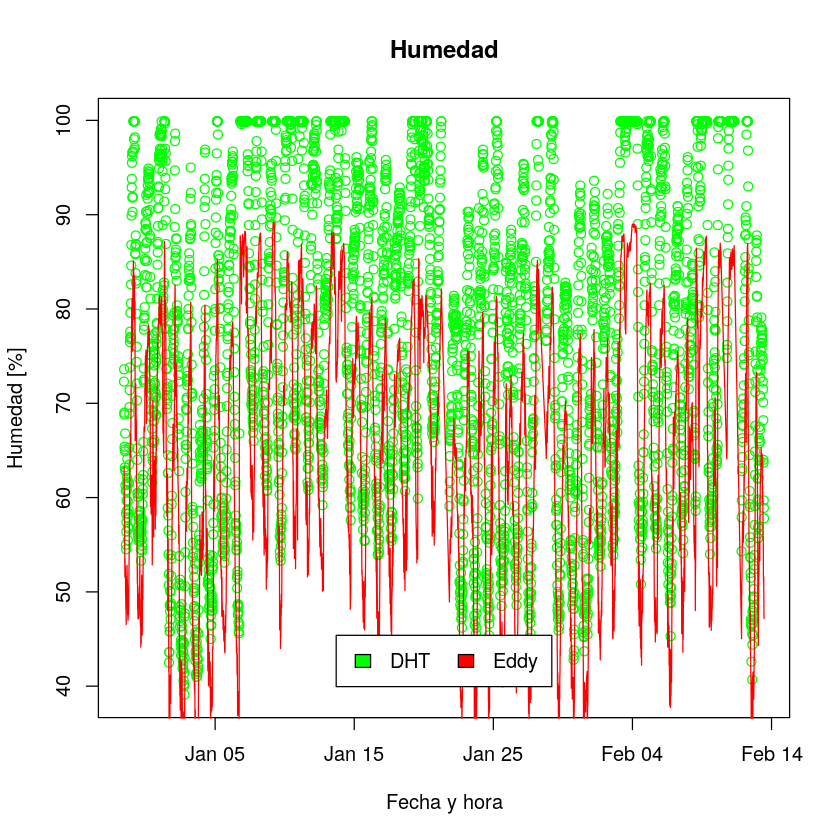

In [9]:
plot(FechayHora, Humedad.DHT, col="green", main="Humedad", 
     xlab="Fecha y hora", ylab="Humedad [%]")
lines(FechayHora, Humedad.Eddy,col="red")
legend("bottom", inset=.05, c("DHT","Eddy"), fill=c("green","red"), horiz=TRUE)

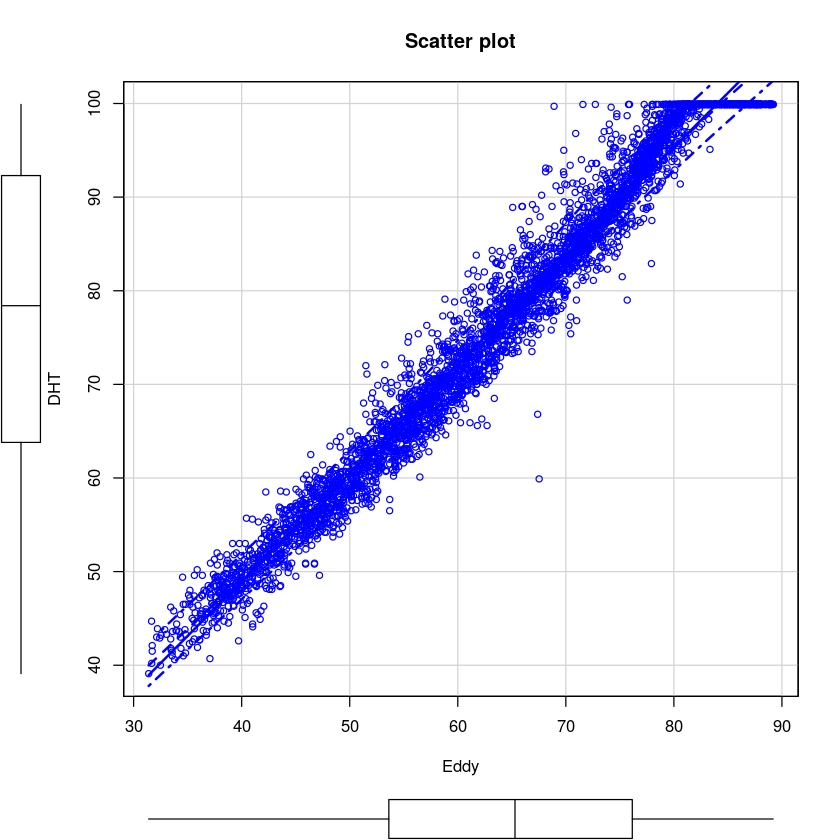

In [10]:
library(car)
scatterplot(Humedad.DHT ~ Humedad.Eddy, data=datosHT, xlab="Eddy", ylab="DHT", main="Scatter plot") 

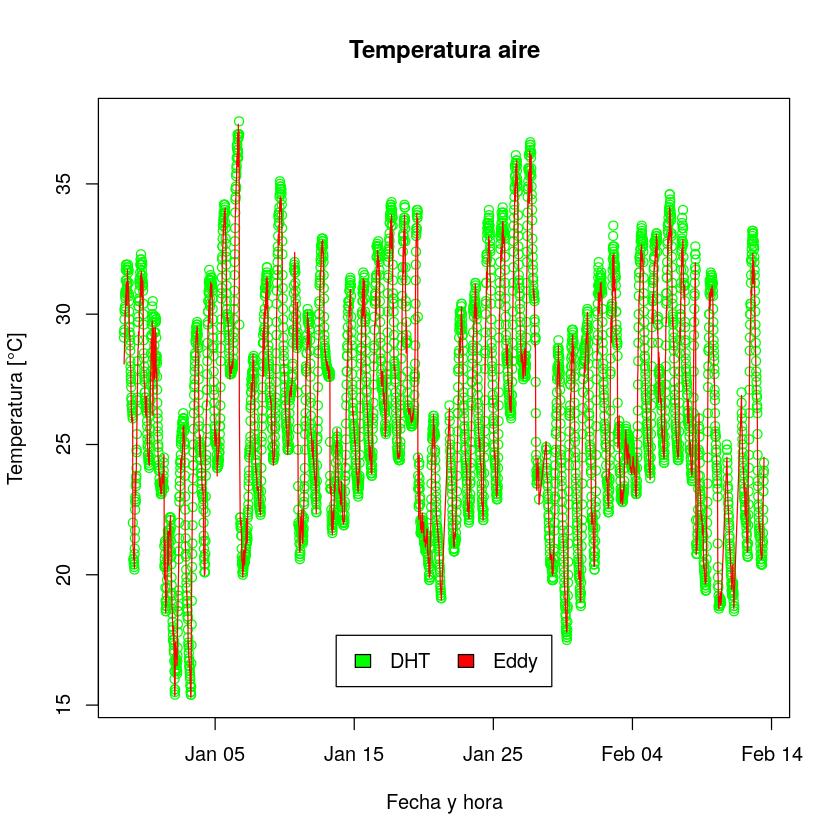

In [11]:
plot(FechayHora, Temperatura.DHT, col="green", main="Temperatura aire", 
     xlab="Fecha y hora", ylab="Temperatura [°C]")
lines(FechayHora, Temperatura.Eddy,col="red")
legend("bottom", inset=.05, c("DHT","Eddy"), fill=c("green","red"), horiz=TRUE)

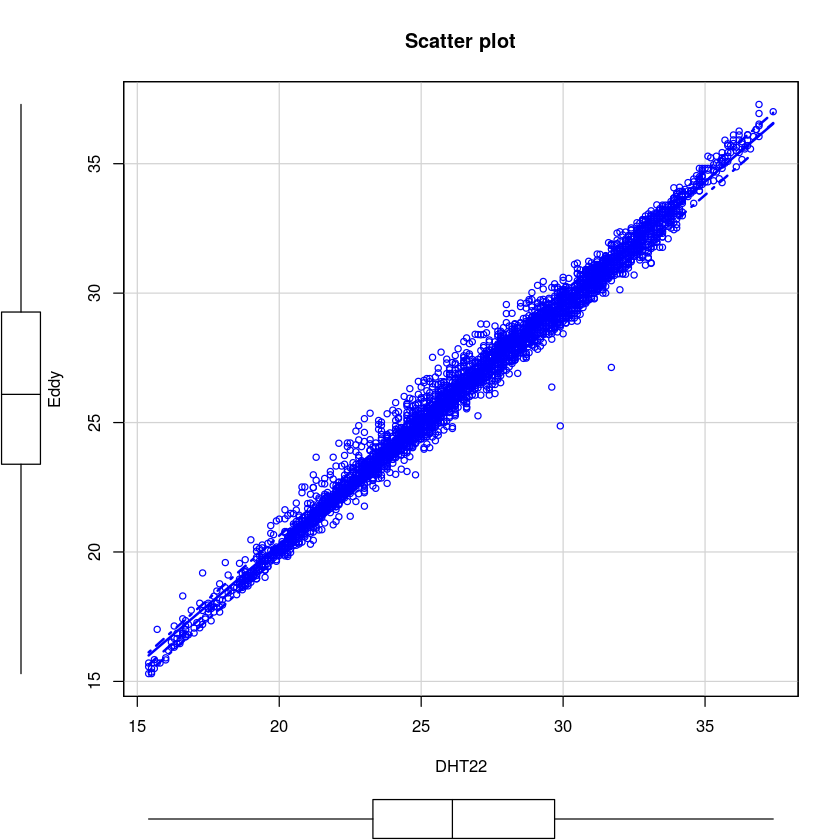

In [12]:
scatterplot(Temperatura.Eddy ~ Temperatura.DHT, data=datosHT, xlab="DHT22", ylab="Eddy", main="Scatter plot") 

In [14]:
modeloTemp = lm(Temperatura.Eddy ~ Temperatura.DHT)
summary(modeloTemp)


Call:
lm(formula = Temperatura.Eddy ~ Temperatura.DHT)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6731 -0.2375 -0.0144  0.2077  2.1789 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.623052   0.043124   37.64   <2e-16 ***
Temperatura.DHT 0.933781   0.001611  579.70   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4453 on 4216 degrees of freedom
Multiple R-squared:  0.9876,	Adjusted R-squared:  0.9876 
F-statistic: 3.36e+05 on 1 and 4216 DF,  p-value: < 2.2e-16


## Temperatura del suelo

Resumen: En este caso se contrasta la temperatura de suelo registrada por el sensor HydraProbeII de Stevens con la medida por el sensor DS18B20. 

In [15]:
datosTS = read.csv("datos/stevens_fc_ds/ds_vs_stevensTiempo.csv", sep=",")
str(datosTS)
head(datosTS)
attach(datosTS)

'data.frame':	275 obs. of  3 variables:
 $ tiempo : num  0.15 0.3 0.45 0.6 0.75 0.9 1.05 1.2 1.35 1.5 ...
 $ Stevens: num  25.6 26.2 26.2 26.2 26.2 26.2 26.2 26.2 26.2 26.2 ...
 $ DS18B20: num  26 26.1 26 26 26 ...


tiempo,Stevens,DS18B20
0.15,25.6,26.00
0.30,26.2,26.06
0.45,26.2,26.00
0.60,26.2,26.00
0.75,26.2,26.00
0.90,26.2,26.00


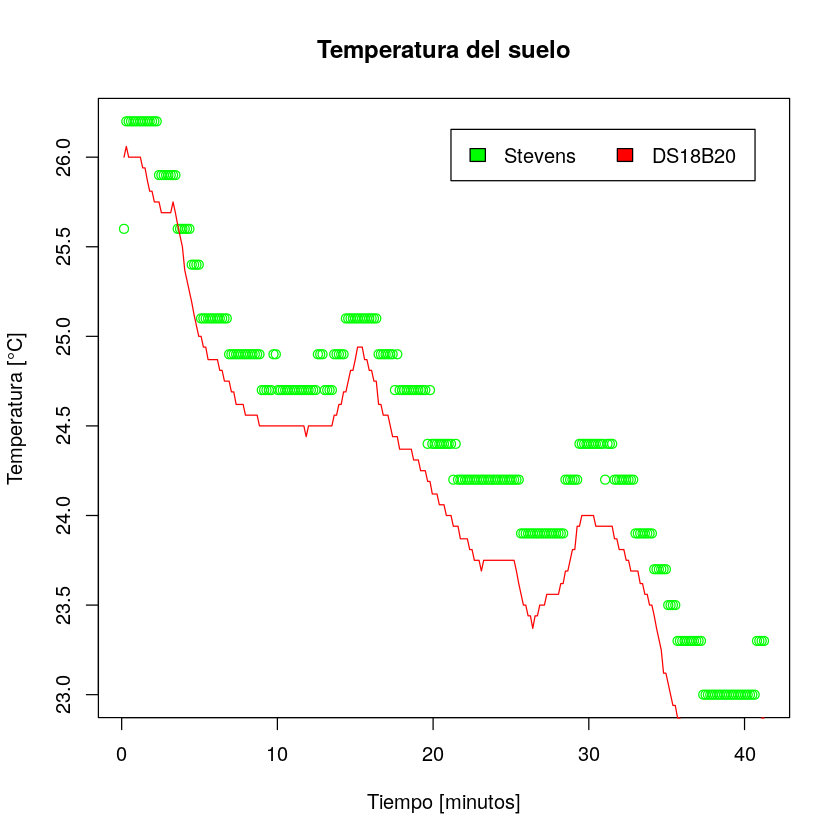

In [16]:
plot(tiempo, Stevens, col="green", main="Temperatura del suelo", 
     xlab="Tiempo [minutos]", ylab="Temperatura [°C]")
lines(tiempo, DS18B20, col="red")
legend("topright", inset=.05, c("Stevens","DS18B20"), fill=c("green","red"), horiz=TRUE)

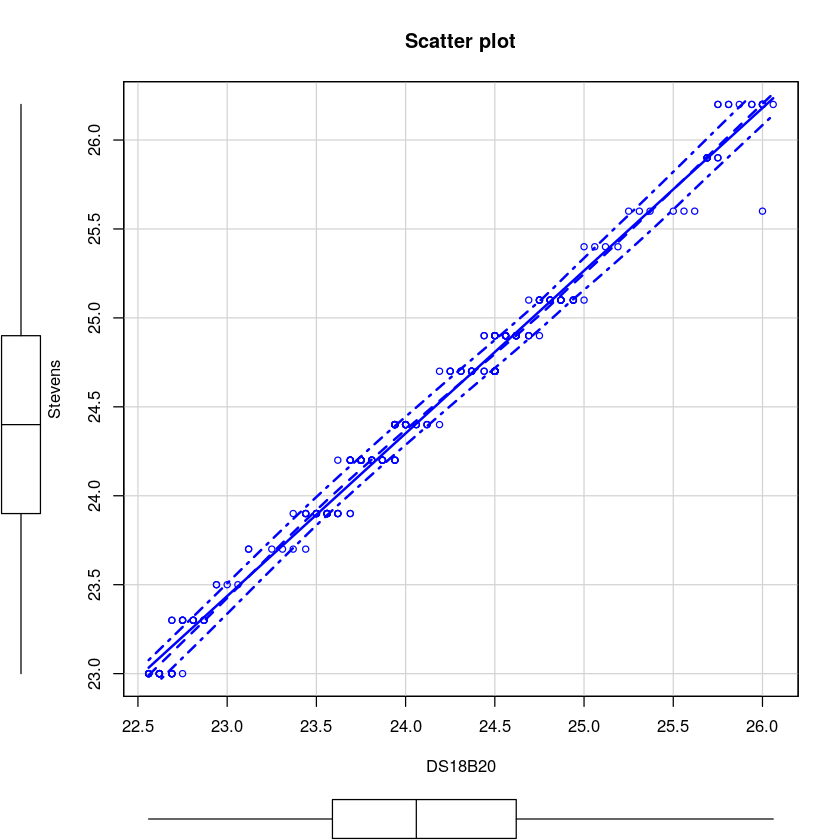

In [18]:
scatterplot(Stevens ~ DS18B20, data=datosTS, xlab="DS18B20", ylab="Stevens", main="Scatter plot") 

## Anemómetro

Resumen: en este caso se contrasta el anemómetro del Centro de Informaciones Meteorológicas de la FICH, parte de la estación meteorológica Pegasus, con el adquirido por el CENEHA y utilizado en un dispositivo Arduino.

In [19]:
datosV = read.csv("datos/anemom_pegasus/pegasus_vs_anem2.csv", sep=",")
datosV$FechayHora = as.POSIXct(datosV$FechayHora, format = "%d/%m/%Y %H:%M")
str(datosV)
head(datosV)
attach(datosV)

'data.frame':	459 obs. of  3 variables:
 $ FechayHora: POSIXct, format: "2016-12-05 16:51:00" "2016-12-05 16:57:00" ...
 $ Pegasus   : num  0.9 7.8 4.9 0.9 4.9 0.9 0.9 6.8 3.9 0.9 ...
 $ Arduino   : num  4.25 4.54 1.03 2.08 2.3 1.03 4.19 3.3 1.73 6.65 ...


FechayHora,Pegasus,Arduino
2016-12-05 16:51:00,0.9,4.25
2016-12-05 16:57:00,7.8,4.54
2016-12-05 17:03:00,4.9,1.03
2016-12-05 17:08:00,0.9,2.08
2016-12-05 17:14:00,4.9,2.30
2016-12-05 17:20:00,0.9,1.03


The following object is masked from datosHT:

    FechayHora

The following object is masked from datosRio:

    FechayHora



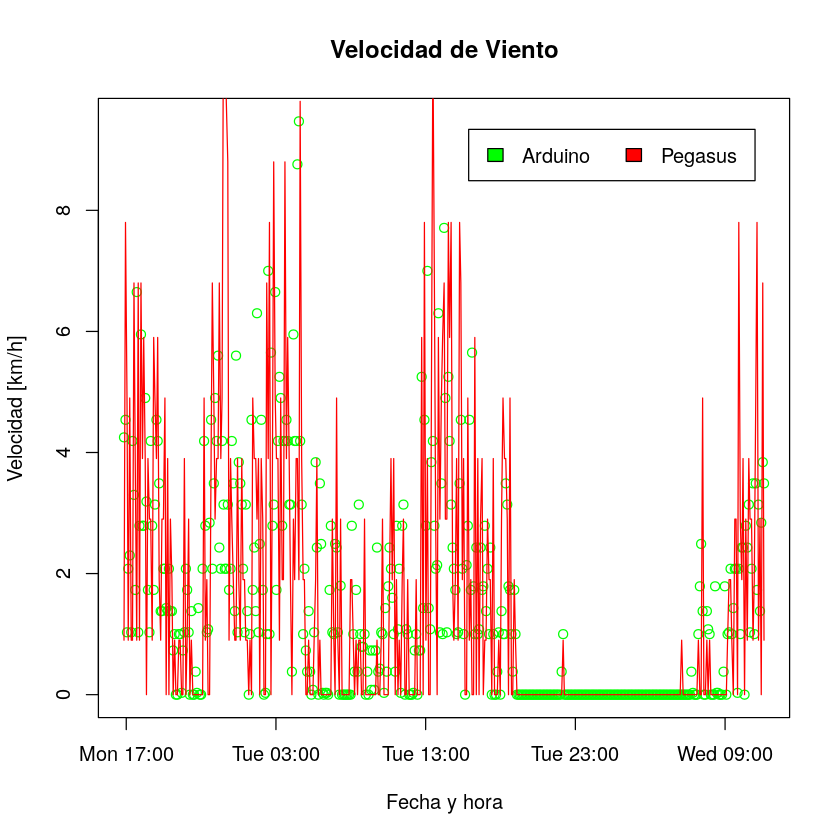

In [20]:
plot(FechayHora, Arduino, col="green", main="Velocidad de Viento", 
     xlab="Fecha y hora", ylab="Velocidad [km/h]")
lines(FechayHora, Pegasus, col="red")
legend("topright", inset=.05, c("Arduino","Pegasus"), fill=c("green","red"), horiz=TRUE)

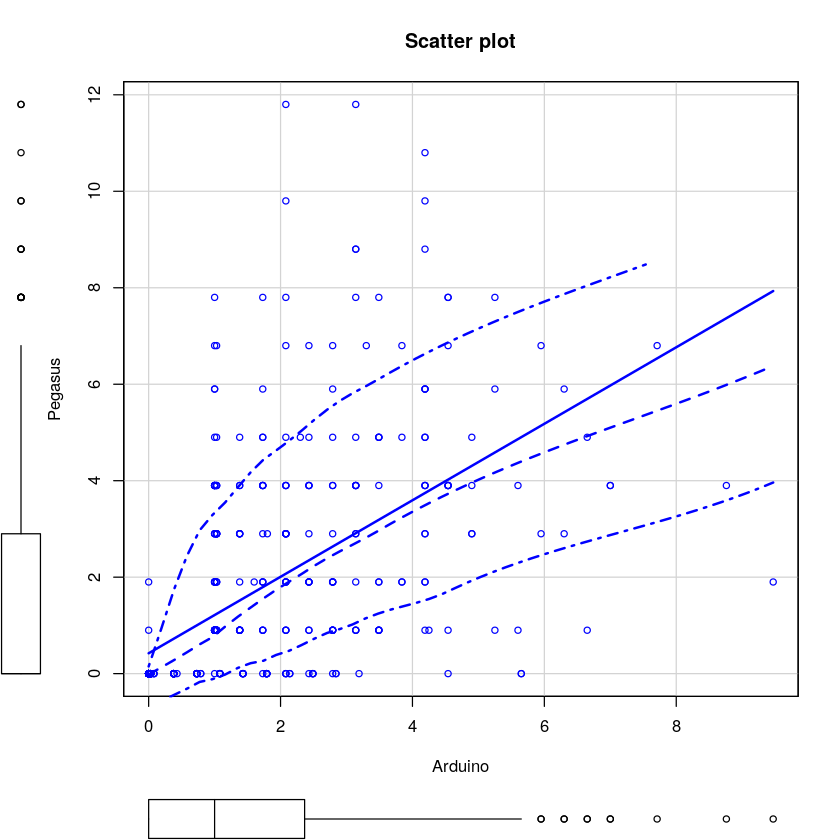

In [21]:
scatterplot(Pegasus ~ Arduino, data=datosV, xlab="Arduino", ylab="Pegasus", main="Scatter plot") 